## Лабораторна робота № 5 </br>
### Моделювання та оцінювання гетероскедастичних процесів 

In [1]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd


%matplotlib inline
plt.rcParams["figure.figsize"] = (6,6)
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append("../")

In [3]:
from Lab_1.metrics import *

give me a bottle of rum!


In [4]:
from arch import arch_model

In [5]:
def read_data_from_file(file_path):
    with open(file_path) as file:
        content = file.read()   
    content = content.split('\n')
    return list(map(float, content))

In [6]:
def create_feature_matrix(x, ar):
        len_matr = x.shape[0] - ar
        feature_matrix = pd.DataFrame({"intercept":np.ones((1,len_matr))[0]}, index = range(len_matr))
        for i in range(1, ar+1):
            feature_matrix[f"y(k-{i})"] = x[ar-i:-i]
        y = x[ar:]
        return y, feature_matrix

In [7]:
def lsm(y, feature):

        feature_matrix=feature.to_numpy()
        inform_matr = np.linalg.pinv(feature_matrix.T@feature_matrix)
        inform_matr = inform_matr @ feature_matrix.T
        return inform_matr@y

In [8]:
data = read_data_from_file('data/ARCH_01.dat')

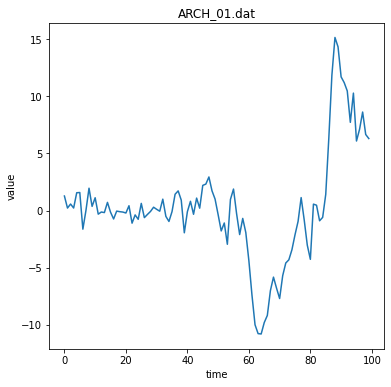

In [9]:
plt.plot(data)
plt.xlabel('time')
plt.ylabel('value')
plt.title('ARCH_01.dat')
plt.show();

### Знайдіть середнє значення ряду, стандартне відхилення

In [10]:
pd.DataFrame(data, columns =['value']).describe()

,value
count,100.000000
mean,0.263369
std,4.894091
min,-10.800000
25%,-1.091000
50%,-0.083150
75%,1.309250
max,15.150000


### Побудувати для введених даних модель АР(1) 

In [11]:
pacf(data, nlags =24, method = 'ldb')

array([ 1.        ,  0.92922263, -0.15349537, -0.04926874,  0.02341412,
       -0.01291659, -0.17901202,  0.05069447, -0.00350981,  0.06665667,
       -0.12681158, -0.14454636, -0.1210458 ,  0.06929319, -0.15570696,
        0.12090072,  0.01242465,  0.00846026, -0.1931802 , -0.0073612 ,
        0.00927294, -0.11284645, -0.08647626, -0.10118011, -0.0961931 ])

In [12]:
ar_1 = ARIMA(data, order= ([1], 0 , 0))
ar_1 = ar_1.fit()
ar_1_predict = ar_1.predict()
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -196.291
Date:                Sun, 25 Apr 2021   AIC                            398.582
Time:                        18:15:05   BIC                            406.397
Sample:                             0   HQIC                           401.745
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0493      2.803      0.374      0.708      -4.445       6.543
ar.L1          0.9348      0.031     29.942      0.000       0.874       0.996
sigma2         2.9073      0.355      8.199      0.000       2.212       3.602
===================================================================================
Ljung-Box (L1) (Q):                   2.55   Jarque-Bera (JB):                13.95
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               4.88   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

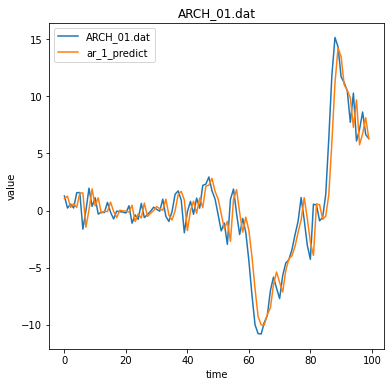

In [13]:
plt.plot(data, label = 'ARCH_01.dat')
plt.xlabel('time')
plt.ylabel('value')
plt.title('ARCH_01.dat')

plt.plot(ar_1_predict, label = 'ar_1_predict')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()
plt.show();

### Побудуйте автокореляційну функцію (АКФ) для отриманого після побудови моделі АР(1) ряду із залишків. 

In [14]:
resid = data - ar_1_predict

In [15]:
pd.DataFrame(resid, columns =['value']).describe()

,value
count,100.000000
mean,-0.002095
std,1.713805
min,-3.591352
25%,-1.355243
50%,0.031993
75%,0.849397
max,5.848582


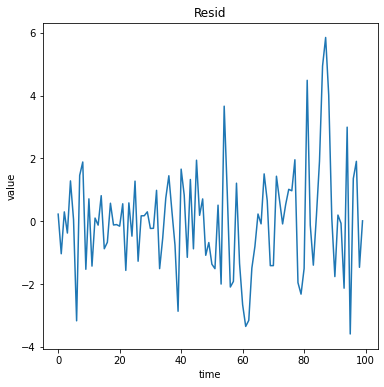

In [16]:
plt.plot(resid)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Resid')
plt.show();

In [17]:
acf(resid, nlags=24)

array([ 1.        ,  0.15669633,  0.01433378, -0.00930987, -0.00369124,
        0.07528894,  0.006888  , -0.09098415, -0.14212275,  0.06777887,
        0.10587991,  0.09240054, -0.0341311 ,  0.12803238, -0.06201404,
       -0.03927552, -0.05703165,  0.01199997, -0.00586518, -0.03098624,
        0.05174283, -0.05408233,  0.06096627,  0.03144894, -0.1945588 ])

### Згенеруйте новий ряд із квадратів залишків

In [18]:
resid_sqr = resid*resid

In [19]:
pd.DataFrame(resid_sqr, columns =['value']).describe()

,value
count,100.000000
mean,2.907760
std,5.281829
min,0.000114
25%,0.206259
50%,1.128405
75%,2.527925
max,34.205912


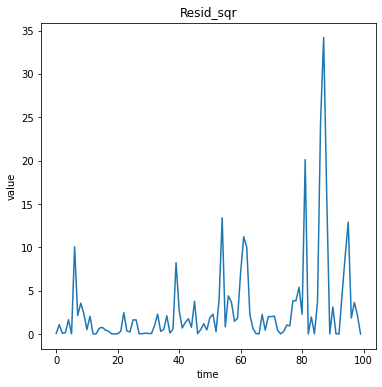

In [20]:
plt.plot(resid_sqr)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Resid_sqr')
plt.show();

### Обчисліть автокореляційну функцію для ряду із квадратів залишків. 

In [21]:
acf(resid_sqr, nlags=24)

array([ 1.        ,  0.48566616,  0.13249208, -0.05249931, -0.08582649,
        0.04973652,  0.22693413,  0.27843206,  0.22345272,  0.13588563,
       -0.01050615, -0.07132324, -0.09656088, -0.07361059,  0.01481384,
       -0.01705337,  0.01616779,  0.03028693, -0.00801584,  0.01533594,
        0.00323824, -0.02393287, -0.06280178, -0.02739885,  0.06118613])

### За допомогою МНК обчисліть оцінки коефіцієнтів рівняння першого порядку для дисперсії залишків

In [22]:
y_1, feature_1 = create_feature_matrix(resid_sqr, 1)

In [23]:
coef_1 = lsm(y_1, feature_1)
coef_1

array([1.50582651, 0.48714202])

In [25]:
def calc_result(y:list, matr:pd.DataFrame, p:int, q:int):
    '''
    Calculates the estimation of coefficients of different models and prints some of the results.
    Parameters:
        y: actual time series
        matr: matrix of features
    Returns:
        fitted: fitted values of model
    '''
    coefs = lsm(y, matr)
    fitted = matr.to_numpy()@coefs
    eq_matr = matr.columns.copy()
    eq_matr = [f"{round(coefs[i], 5)}{'*'+eq_matr[i] if eq_matr[i] != 'intercept' else ''}" 
               for i in range(len(eq_matr))]
    eq = ""
    for i in range(len(eq_matr)):
        eq += "+ "+eq_matr[i] if coefs[i] > 0 and i!= 0 else " "+eq_matr[i]
        eq += " "
    print(f"Equation: {eq}")
    print(f"RSS: {RSS(y, fitted)}")
    print(f"R^2: {R_squared(y, fitted)}")
    print(f"IKA: {IKA(y, fitted, p, q)}")
    return fitted

In [26]:
fitted_y_1 = calc_result(y_1, feature_1, p = 1, q = 0)

Equation:  1.50583 + 0.48714*y(k-1) 
RSS: 2100.2384085698777
R^2: 0.23728229568129844
IKA: 761.3308083706547


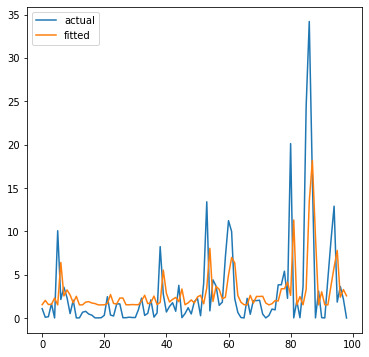

In [27]:
plt.plot(y_1, label = "actual")
plt.plot(fitted_y_1, label = "fitted")
plt.legend()

### Обчисліть коефіцієнти рівняння АРУГ(4)

In [28]:
y_4, feature_4 = create_feature_matrix(resid_sqr, 4)

In [29]:
coef_4 = lsm(y_4, feature_4)
coef_4

array([ 1.92036876,  0.53941521, -0.09438732, -0.07731528, -0.0069391 ])

In [30]:
fitted_y_4 = calc_result(y_4, feature_4, p = 4, q = 0)

Equation:  1.92037 + 0.53942*y(k-1)  -0.09439*y(k-2)  -0.07732*y(k-3)  -0.00694*y(k-4) 
RSS: 2040.2272680942394
R^2: 0.2536631837903989
IKA: 741.5983827099167


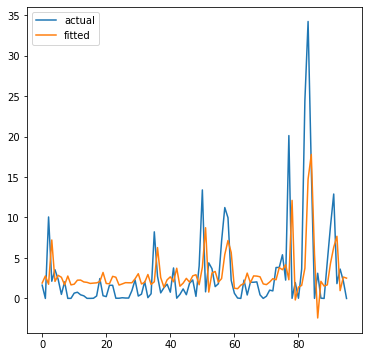

In [31]:
plt.plot(y_4, label = "actual")
plt.plot(fitted_y_4, label = "fitted")
plt.legend()

### Побудуйте ряд умовних дисперсій для `ARCH_01.DAT`  і побудуйте узагальнену авторегресійну умовно гетероскедастичну (УАРУГ) модель процесу

In [32]:
def cond_var(ts:list):
    '''
    Computation of conditional variance to determine the q lag in GARCH model
    Params:
        data: time series in list format
    Returns:
        h: list of conditional variances
    '''
    h = []
    np_ts = np.array(ts)
    
    for k in range(2, len(ts)):
        sub_ts = np_ts[:k]
        mean_sub_ts = sub_ts.mean()
        h.append(sub_ts.var())
    
    return h

In [33]:
h_data = cond_var(data)
pacf(h_data, nlags = 24)

array([ 1.        ,  0.96672342, -0.12347502, -0.0795857 , -0.07309386,
       -0.06727752,  0.00635988, -0.04275271,  0.00968174,  0.01946871,
        0.03411021,  0.10531371,  0.13038543,  0.06682686, -0.01721172,
       -0.04944995, -0.03781251, -0.02711322, -0.01744625, -0.01047048,
        0.00346153,  0.00544116,  0.00522321, -0.00578887, -0.04815503])

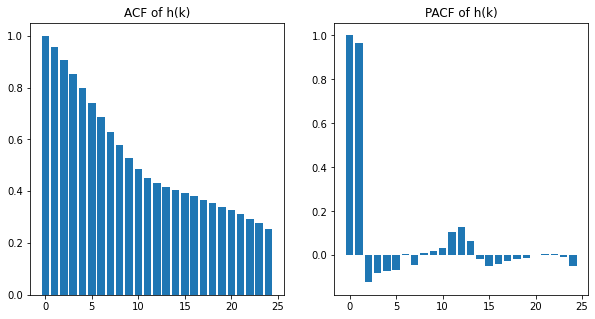

In [34]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].bar(range(25),acf(h_data, nlags = 24));
ax[1].bar(range(25),pacf(h_data, nlags = 24));
ax[0].set_title("ACF of h(k)")
ax[1].set_title("PACF of h(k)")

fig.show()

In [35]:
pacf(resid_sqr, nlags =24)

array([ 1.        ,  0.49057187, -0.13889018, -0.08261465, -0.00908478,
        0.15022754,  0.19450956,  0.09714705,  0.0600347 ,  0.06032557,
       -0.07456528, -0.03592407, -0.11308669, -0.08740893,  0.00446946,
       -0.15808696,  0.06283821,  0.04589846,  0.0079943 ,  0.13417262,
        0.0206965 ,  0.02509035, -0.06332799,  0.01644656,  0.12129773])

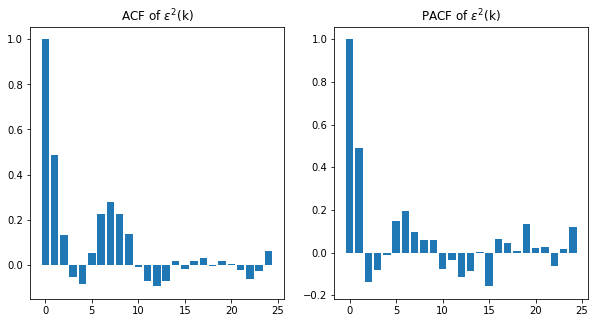

In [36]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].bar(range(25),acf(resid_sqr, nlags = 24));
ax[1].bar(range(25),pacf(resid_sqr, nlags = 24));
ax[0].set_title(r"ACF of $\varepsilon^2$(k)")
ax[1].set_title(r"PACF of $\varepsilon^2$(k)")

fig.show()

За АКФ $\varepsilon^2(k)$ та $h(k)$ візьмемо $p = q = 1$

In [37]:
def create_feature_matrix_garch(h:list, eps:list, p:int = 1, q:int = 1):
    '''
    Creation of feature matrix to estimate the GARCH model
    Parameters:
        h: list of conditional variances
        eps: list of residuals
        p: number of lags of h(k)
        q: number of lags of eps_sq(k)
    Returns:
        y: list of h(k) 
        feature_matrix: the created feature matrix
    '''
    k = max(p, q)
    np_h = np.array(h).copy()
    len_matr = np_h.shape[0] - k
    eps_sq =  (np.array(eps).copy()**2)[2:]
    feature_matrix = pd.DataFrame({"intercept":np.ones((1,len_matr))[0]}, index = range(len_matr))
    for i in range(1, q+1):
        feature_matrix[f"eps_sq(k-{i})"] = eps_sq[q-i:-i-(k - q)]
    for j in range(1, p+1):
        feature_matrix[f"h(k-{j})"] = np_h[p-j:-j - (k - p)]
    y = np_h[-len_matr:]
    return y, feature_matrix

In [38]:
h, garch_matr = create_feature_matrix_garch(h_data, resid, p = 1, q = 1)

In [39]:
garch_matr.head()

,intercept,eps_sq(k-1),h(k-1)
0,1.0,0.087509,0.276623
1,1.0,0.143022,0.191311
2,1.0,1.644296,0.183927
3,1.0,0.002839,0.303253
4,1.0,10.064183,0.343886


In [40]:
garch_1_fitted = calc_result(h, garch_matr, 1, 1)

Equation:  0.00141 + 0.03244*eps_sq(k-1) + 1.02699*h(k-1) 
RSS: 22.08719550470156
R^2: 0.9950906698683664
IKA: 306.21481101349843


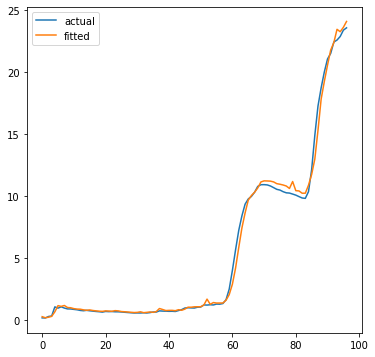

In [41]:
plt.plot(h, label = "actual")
plt.plot(garch_1_fitted, label = "fitted")
plt.legend()

### Побудуйте модель гетероскедастичного процесу

In [42]:
cond_res_sq = cond_var(resid)

In [43]:
acf(cond_res_sq, nlags = 24)

array([1.        , 0.9243114 , 0.8390088 , 0.73190704, 0.63547203,
       0.54371262, 0.49592574, 0.45704053, 0.42442669, 0.39198765,
       0.35633783, 0.32199297, 0.29068008, 0.27260923, 0.26542273,
       0.25806171, 0.24800858, 0.23470802, 0.21811607, 0.20812681,
       0.19502319, 0.18214253, 0.17240944, 0.16474067, 0.15754725])

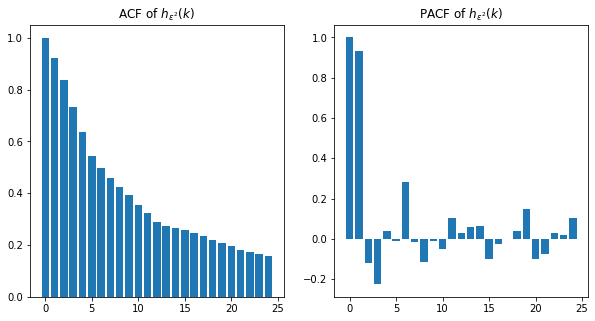

In [44]:
fig, ax = plt.subplots(1, 2,figsize=(10, 5))
ax[0].bar(range(25),acf(cond_res_sq, nlags = 24));
ax[1].bar(range(25),pacf(cond_res_sq, nlags = 24));
ax[0].set_title(r"ACF of $h_{\varepsilon^2}(k)$")
ax[1].set_title(r"PACF of $h_{\varepsilon^2}(k)$")

fig.show()

У даному випадку, $p = 6$, тоді як $q = 1$, як у минулому завданні.

In [45]:
h_res, garch_matr_res = create_feature_matrix_garch(cond_res_sq, resid, p = 6, q = 1)

In [46]:
garch_matr_res.head()

,intercept,eps_sq(k-1),h(k-1),h(k-2),h(k-3),h(k-4),h(k-5),h(k-6)
0,1.0,0.087509,1.714433,0.495255,0.594210,0.288976,0.374736,0.397541
1,1.0,0.143022,1.874109,1.714433,0.495255,0.594210,0.288976,0.374736
2,1.0,1.644296,2.078152,1.874109,1.714433,0.495255,0.594210,0.288976
3,1.0,0.002839,2.100628,2.078152,1.874109,1.714433,0.495255,0.594210
4,1.0,10.064183,1.962930,2.100628,2.078152,1.874109,1.714433,0.495255


In [49]:
garch_fitted_res = calc_result(h_res, garch_matr_res, p = 6, q = 1)

Equation:  -0.00626 + 0.0013*eps_sq(k-1) + 1.21947*h(k-1)  -0.06459*h(k-2)  -0.2056*h(k-3)  -0.05996*h(k-4) + 0.12936*h(k-5)  -0.0122*h(k-6) 
RSS: 0.4478228192778958
R^2: 0.9842131962188617
IKA: -57.90890080800156


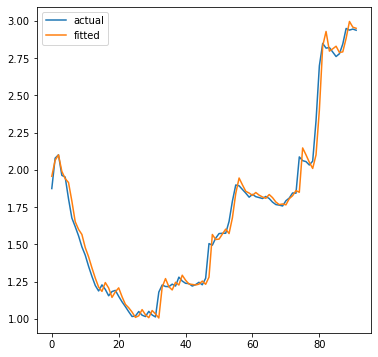

In [48]:
plt.plot(h_res, label = "actual")
plt.plot(garch_fitted_res, label = "fitted")
plt.legend()